In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mofgraph2vec.trainer.supervised import train
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = OmegaConf.load("../conf/config.yaml")
config.data = OmegaConf.load("../conf/data/nn.yaml")
config.model = OmegaConf.load("../conf/model/sklearn.yaml")

In [11]:
config.data.nn.label_path = "../data/data.csv"
config.data.nn.embedding_path = "../experiments/workflow/wandb/run-20230210_121736-uc2y93sm/tmp/embedding.csv"
config.model.max_epochs = 100

In [12]:
dmf = DataModuleFactory(**config.data.nn)

2023-02-10 12:20:28.027 | INFO     | mofgraph2vec.data.datamodule:__init__:66 - Train: 2637 Valid: 294 Test: 326


In [13]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [14]:
model = pickle.load(open("../experiments/workflow/wandb/run-20230210_121736-uc2y93sm/tmp/best_model.pkl", 'rb'))

In [15]:
pred = model.predict(test_ds.vectors)

In [16]:
trues = test_ds.labels

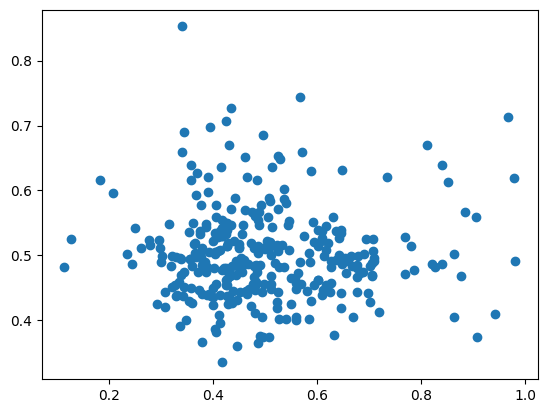

In [17]:
plt.scatter(trues, pred)